# Setup

In [1]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot
from scipy import optimize
import utils4

In [2]:
# load data
data = loadmat('ex4data1.mat')

X, y = data['X'], data['y'].ravel()

# reindex to 0 as data is from Matlab
y[y == 10] = 0

m = y.size

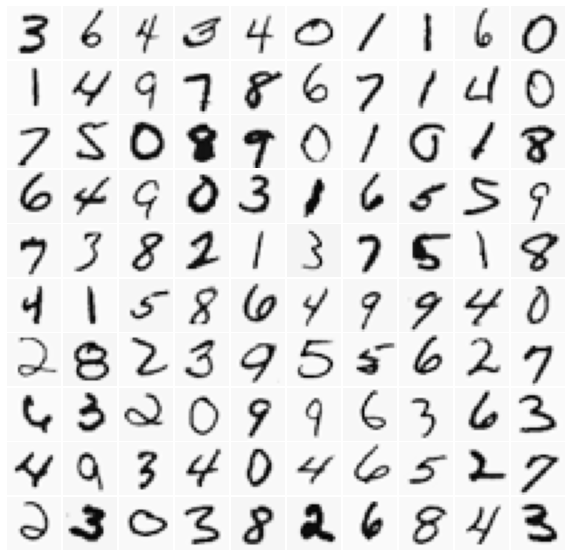

In [3]:
# plot sample
rand_indices = np.random.choice(m, 100, replace=False)

sel = X[rand_indices, :]

utils4.displayData(sel)

# Create a Neural Net from Scratch

In [4]:
# set parameters
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [5]:
# load weights
weights = loadmat('ex4weights.mat')
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# rearrange columns to match Matlab formatting
Theta2 = np.roll(Theta2, 1, axis=0)

nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])

In [6]:
def sigmoidGradient(z):
    return utils4.sigmoid(z) * (1 - utils4.sigmoid(z))

In [7]:
# Cost function for neural net
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_=0.0):

    # reshape nn_params back into Theta weights
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
        (hidden_layer_size, (input_layer_size + 1)))
    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))

    m = y.size

    # node activation
    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)

    a2 = utils4.sigmoid(a1.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)

    a3 = utils4.sigmoid(a2.dot(Theta2.T))

    y_matrix = y.reshape(-1)
    y_matrix = np.eye(num_labels)[y_matrix]

    # cost function
    temp1 = Theta1
    temp2 = Theta2

    reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:,1:])))

    J = (-1 / m) * np.sum((np.log(a3) * y_matrix) + np.log(1 - a3) * (1 - y_matrix)) + reg_term

    # backpropagation
    delta_3 = a3 - y_matrix
    delta_2 = delta_3.dot(Theta2)[:,1:] * sigmoidGradient(a1.dot(Theta1.T))

    Delta1 = delta_2.T.dot(a1)
    Delta2 = delta_3.T.dot(a2)

    # add regularization to gradient
    Theta1_grad = (1 / m) * Delta1
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (lambda_ / m) * Theta1[:, 1:]

    Theta2_grad = (1 / m) * Delta2
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (lambda_ / m) * Theta2[:, 1:]

    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])

    return J, grad

In [8]:
# test the cost function
lambda_ = 0
J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)
print('Cost at parameters (loaded from ex4weights): %.6f ' % J)
print('The cost should be about                   : 0.287629.')

Cost at parameters (loaded from ex4weights): 0.287629 
The cost should be about                   : 0.287629.


In [9]:
# add weights
# Weight regularization parameter (we set this to 1 here).
lambda_ = 1
J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                      num_labels, X, y, lambda_)

print('Cost at parameters (loaded from ex4weights): %.6f' % J)
print('This value should be about                 : 0.383770.')

Cost at parameters (loaded from ex4weights): 0.383770
This value should be about                 : 0.383770.


# Random Initialization

In [10]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    return W

In [11]:
# initialize network
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

In [12]:
# gradient checking
utils4.checkNNgradients(nnCostFunction)

[[-9.27825235e-03 -9.27825236e-03]
 [-3.04978709e-06 -3.04978914e-06]
 [-1.75060084e-04 -1.75060082e-04]
 [-9.62660640e-05 -9.62660620e-05]
 [ 8.89911959e-03  8.89911960e-03]
 [ 1.42869450e-05  1.42869443e-05]
 [ 2.33146358e-04  2.33146357e-04]
 [ 1.17982666e-04  1.17982666e-04]
 [-8.36010761e-03 -8.36010762e-03]
 [-2.59383093e-05 -2.59383100e-05]
 [-2.87468729e-04 -2.87468729e-04]
 [-1.37149709e-04 -1.37149706e-04]
 [ 7.62813550e-03  7.62813551e-03]
 [ 3.69883257e-05  3.69883234e-05]
 [ 3.35320351e-04  3.35320347e-04]
 [ 1.53247082e-04  1.53247082e-04]
 [-6.74798369e-03 -6.74798370e-03]
 [-4.68759764e-05 -4.68759769e-05]
 [-3.76215583e-04 -3.76215587e-04]
 [-1.66560294e-04 -1.66560294e-04]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.64090819e-01  1.64090819e-01]
 [ 1.64567932e-01  1.64567932e-01]
 [ 1.58339334e-01  1.58339334e-01]
 [ 1.51127527e-01  1.51127527e-01]
 [ 1.49568335e-01  1.49568335e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 5.75736494e-02  5.75736493e-02]
 [ 5.77867378e-02  5

In [13]:
# try a different lambda
lambda_ = 3

debug_J, _  = nnCostFunction(nn_params, input_layer_size,
                          hidden_layer_size, num_labels, X, y, lambda_)

print('\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' % (lambda_, debug_J))
print('(for lambda = 3, this value should be about 0.576051)')



Cost at (fixed) debugging parameters (w/ lambda = 3.000000): 0.576051 
(for lambda = 3, this value should be about 0.576051)


# Optimization

In [14]:
options = {'maxiter': 100}

labda_ = 1

costFunction = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

res = optimize.minimize(costFunction, initial_nn_params, jac=True, method='TNC', options=options)

nn_params = res.x

# Extract thetas
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], (hidden_layer_size, (input_layer_size + 1)))
Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], (num_labels, (hidden_layer_size + 1)))

In [16]:
pred = utils4.predict(Theta1, Theta2, X)
print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))

Training Set Accuracy: 93.780000


# Display Hidden Layer

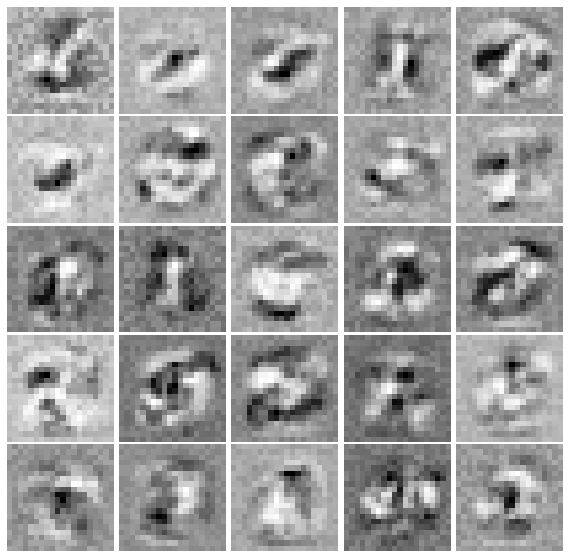

In [17]:
utils4.displayData(Theta1[:, 1:])